#TITANIC DATASET:

The Titanic dataset contains detailed information about the passengers of the RMS Titanic, which tragically sank on its maiden voyage after colliding with an iceberg on April 15, 1912. This dataset is often employed in classification tasks, aiming to predict passenger survival based on various attributes.

### Key Features of the Titanic Dataset:

1. **PassengerId**: Unique identifier for each passenger.
2. **Survived**: Survival status (0 = No, 1 = Yes) indicating whether the passenger survived the disaster.
3. **Pclass**: Passenger's class (1 = 1st, 2 = 2nd, 3 = 3rd), which serves as a proxy for socio-economic status.
4. **Name**: Full name of the passenger, which can be used to extract titles and infer family relations.
5. **Sex**: Gender of the passenger (male or female).
6. **Age**: Age of the passenger in years. Some values may be missing and require imputation.
7. **SibSp**: Number of siblings and spouses the passenger had aboard the Titanic.
8. **Parch**: Number of parents and children the passenger had aboard the Titanic.
9. **Ticket**: Ticket number, which can provide insights into the socio-economic status and travel groupings.
10. **Fare**: Amount of money the passenger paid for the ticket, which also indicates socio-economic status.
11. **Cabin**: Cabin number, which can be used to deduce the passenger's location on the ship. This field has many missing values.
12. **Embarked**: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton), indicating the port where the passenger boarded the ship.



### Problem Statement

**Objective:**
Conduct a comprehensive Exploratory Data Analysis (EDA) of the Titanic dataset to uncover patterns, relationships, and insights that help in understanding the factors influencing passenger survival.

**Goals:**
1. **Data Cleaning and Preparation:**
   - Identify and handle missing values in the dataset.
   - Convert categorical features to appropriate numerical formats if necessary.
   - Create new features (feature engineering) that may provide additional insights.

2. **Descriptive Statistics and Visualization:**
   - Summarize the dataset using descriptive statistics to understand the central tendencies and dispersion of features.
   - Visualize the distribution of key features such as Age, Fare, and Pclass.
   - Visualize the relationship between different features and survival rate using plots such as bar charts, histograms, and box plots.

3. **Univariate Analysis:**
   - Analyze individual features to understand their distribution and characteristics.
   - Identify any outliers and decide on appropriate treatments.

4. **Bivariate and Multivariate Analysis:**
   - Examine the relationships between pairs of features and their combined influence on survival.
   - Use heatmaps, pair plots, and correlation matrices to visualize these relationships.

5. **Segmentation and Patterns:**
   - Segment the data based on features such as Pclass, Sex, Age, and Embarked to uncover patterns in survival rates.
   - Identify any significant differences in survival rates across different passenger groups.

6. **Insights and Conclusions:**
   - Summarize the key findings from the analysis.
   - Draw conclusions about the factors that most strongly influenced survival on the Titanic.
   - Discuss any limitations of the dataset and the analysis.

### Deliverables:
- A detailed report or Jupyter notebook containing:
  - Steps of data cleaning and preparation.
  - Descriptive statistics and visualizations.
  - Univariate, bivariate, and multivariate analyses.
  - Key insights and conclusions drawn from the analysis.

### Example Questions to Explore:
- How does the survival rate vary with passenger class (Pclass)?
- What is the age distribution of the passengers, and how does age relate to survival?
- Are there differences in survival rates between males and females?
- How does the number of siblings/spouses (SibSp) or parents/children (Parch) aboard affect survival?
- Does the port of embarkation (Embarked) influence the chances of survival?
- How does the fare paid by passengers correlate with their survival?

### Learning Outcomes:
- Gain proficiency in handling and cleaning real-world data.
- Develop skills in using descriptive statistics and visualizations to understand data.
- Learn to identify and analyze relationships between features.
- Practice drawing meaningful insights and conclusions from data analysis.

This problem statement provides a clear framework for conducting EDA on the Titanic dataset, ensuring that students can systematically explore and analyze the data to derive meaningful insights.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="whitegrid") # set the background for the graphs


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/kapil/Statistics/Descriptive/8.EDA/data/titanic.csv")
dftitanic=df.copy()

In [ ]:
#data inspection

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# data cleaning

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Survived'].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


<Axes: xlabel='Survived', ylabel='count'>

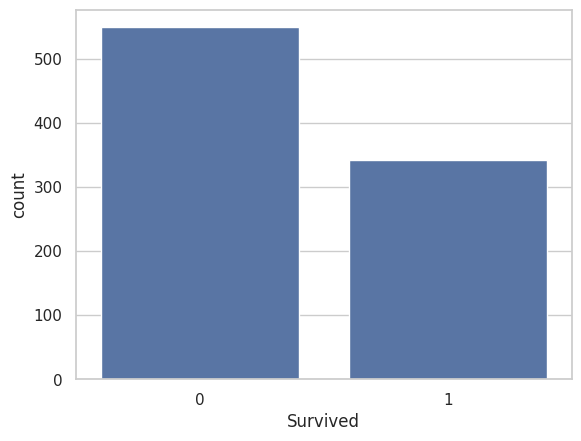

In [ ]:
sns.countplot(data=df, x="Survived")

In [ ]:
# univariate analysis

In [ ]:
# pclass

In [ ]:
df.shape

(891, 12)

<Axes: xlabel='Pclass', ylabel='count'>

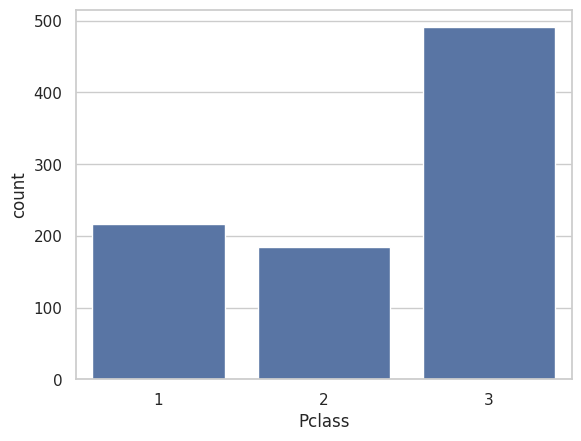

In [ ]:
sns.countplot(data=df, x="Pclass")

In [ ]:
df["Pclass"].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: xlabel='Sex', ylabel='count'>

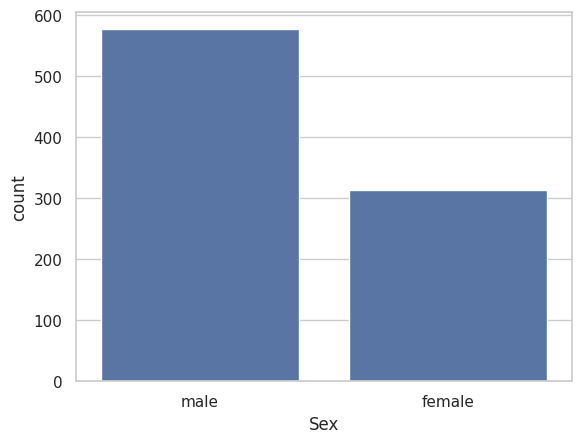

In [ ]:
sns.countplot(data=df, x="Sex")

In [ ]:
df['Sex'].value_counts(normalize=True)

,proportion
Sex,
male,0.647587
female,0.352413


<Axes: xlabel='Age', ylabel='Count'>

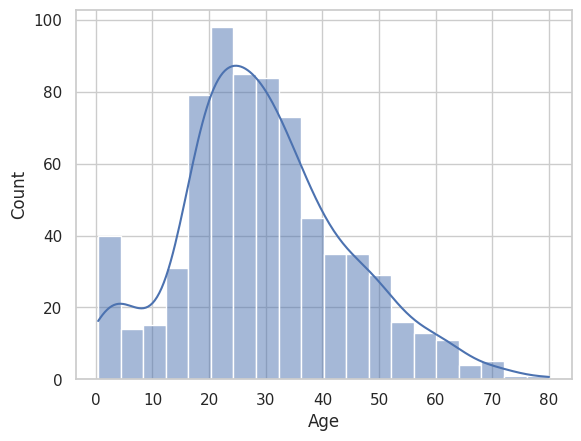

In [ ]:
sns.histplot(data=df, x="Age", kde=True)

In [ ]:
# Observations
 - 20-40
 - right skew
 - considerable number infants on board , due to which we see a second peak around 0


<Axes: xlabel='Age'>

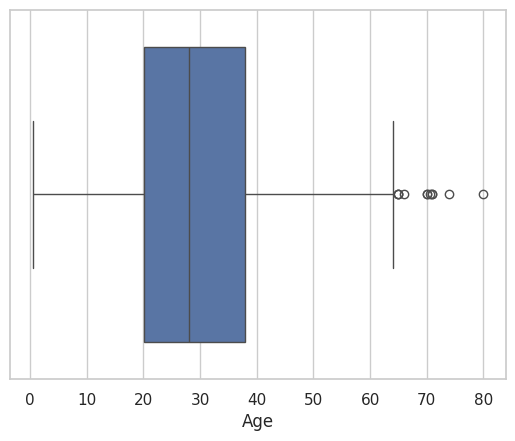

In [ ]:
sns.boxplot(data=df, x="Age")

<Axes: xlabel='SibSp', ylabel='count'>

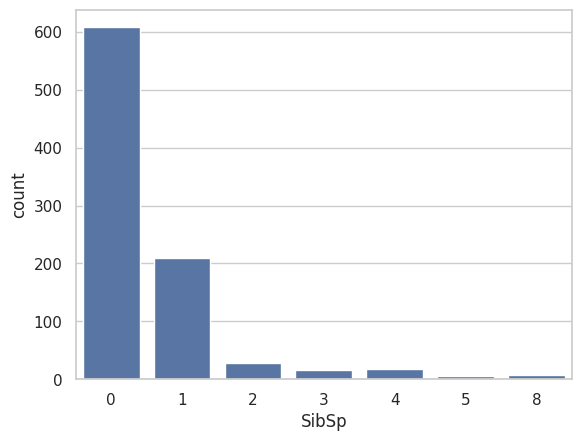

In [ ]:
sns.countplot(data=df, x="SibSp")

In [ ]:
df['SibSp'].value_counts(normalize=True)

,proportion
SibSp,
0,0.682379
1,0.234568
2,0.031425
4,0.020202
3,0.017957
8,0.007856
5,0.005612


<Axes: xlabel='Parch', ylabel='count'>

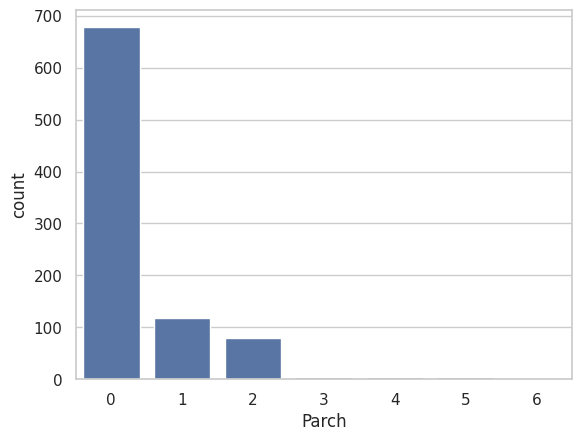

In [ ]:
sns.countplot(data=df, x="Parch")

In [ ]:
df['Parch'].value_counts(), df['Parch'].value_counts(normalize=True)

(Parch
 0    678
 1    118
 2     80
 5      5
 3      5
 4      4
 6      1
 Name: count, dtype: int64,
 Parch
 0    0.760943
 1    0.132435
 2    0.089787
 5    0.005612
 3    0.005612
 4    0.004489
 6    0.001122
 Name: proportion, dtype: float64)

<Axes: xlabel='Fare', ylabel='Count'>

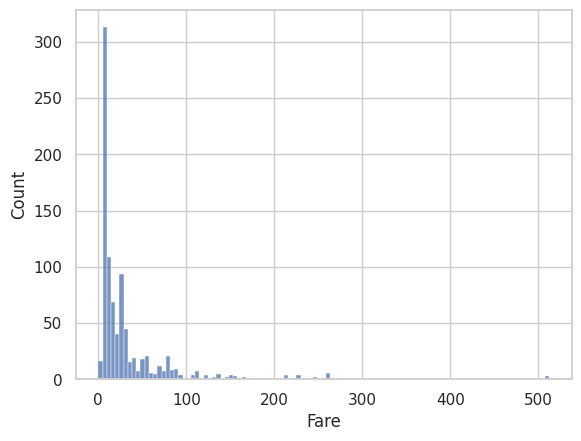

In [ ]:
sns.histplot(data=df, x='Fare')

<Axes: xlabel='Fare'>

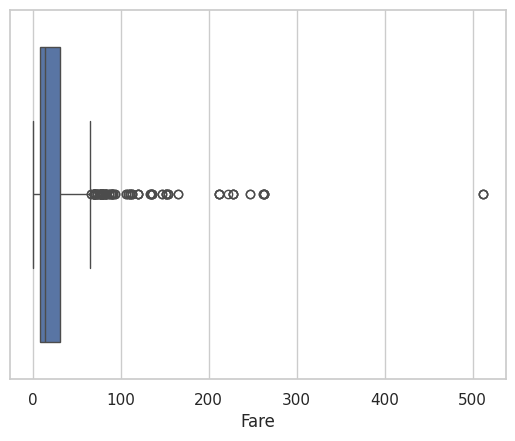

In [ ]:
sns.boxplot(data=df, x="Fare")

<Axes: >

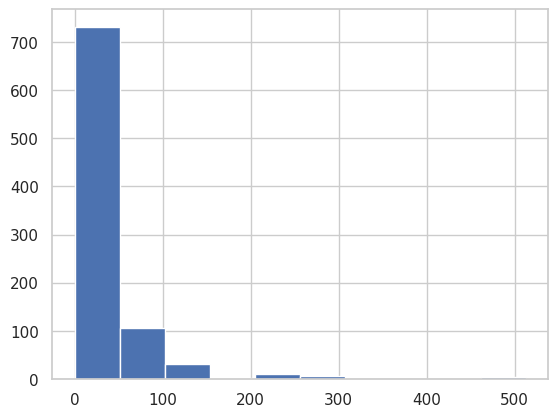

In [ ]:
df["Fare"].hist()

In [ ]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: xlabel='Embarked', ylabel='count'>

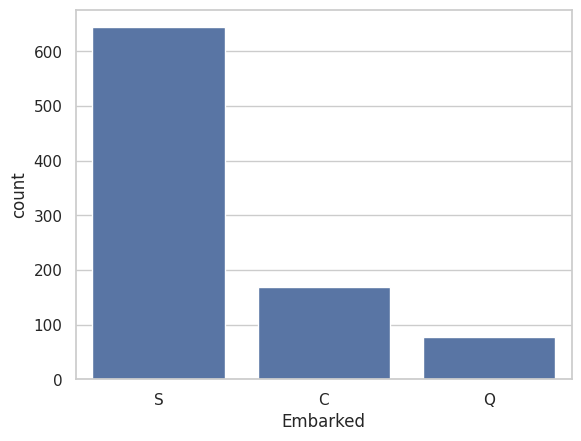

In [ ]:
sns.countplot(data=df, x="Embarked")

In [ ]:
df["Embarked"].value_counts(), df["Embarked"].value_counts(normalize=True)

(Embarked
 S    644
 C    168
 Q     77
 Name: count, dtype: int64,
 Embarked
 S    0.724409
 C    0.188976
 Q    0.086614
 Name: proportion, dtype: float64)

In [ ]:
#Bivariate

<Axes: xlabel='Pclass', ylabel='count'>

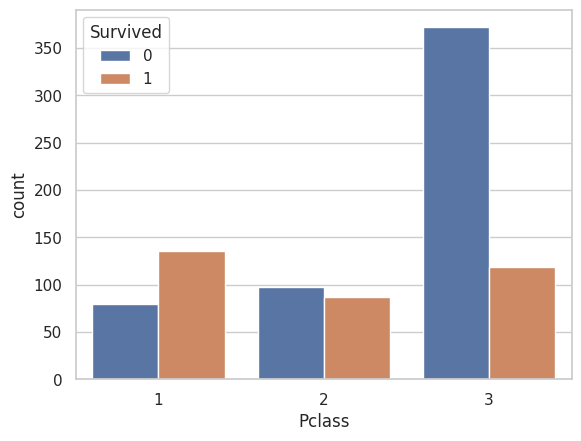

In [ ]:
# Pclass Vs Survived

sns.countplot(data=df, x="Pclass", hue="Survived")

In [ ]:
pd.crosstab(df['Pclass'], df["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
df.groupby("Pclass")["Survived"].value_counts(normalize=True).rename("chances of surv")

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: chances of surv, dtype: float64

<Axes: xlabel='Pclass'>

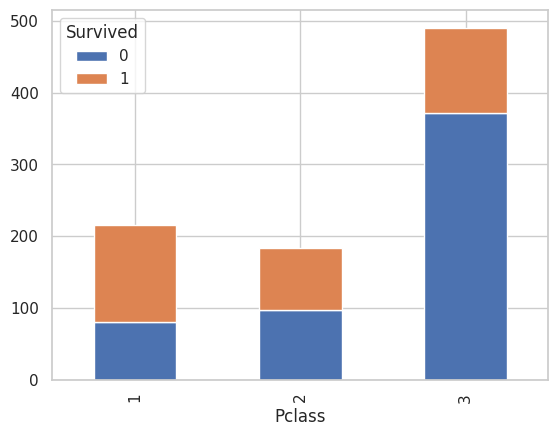

In [ ]:
pd.crosstab(df['Pclass'], df["Survived"]).plot(kind="bar",stacked=True)

<Axes: xlabel='Sex'>

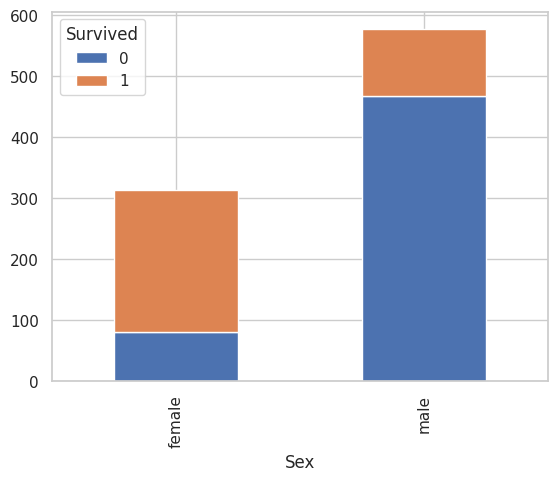

In [ ]:
pd.crosstab(df['Sex'],df['Survived']).plot(kind="bar",stacked=True)

In [ ]:
df.groupby("Sex")["Survived"].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

In [ ]:
# Age vs Surv

<Axes: xlabel='Age', ylabel='Count'>

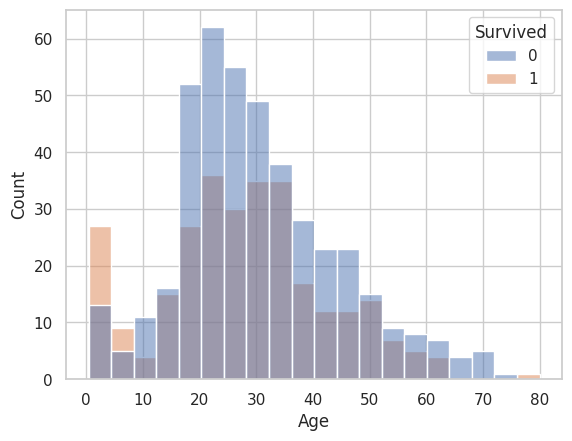

In [ ]:
sns.histplot(data=df, x="Age", hue="Survived")

<Axes: xlabel='Age'>

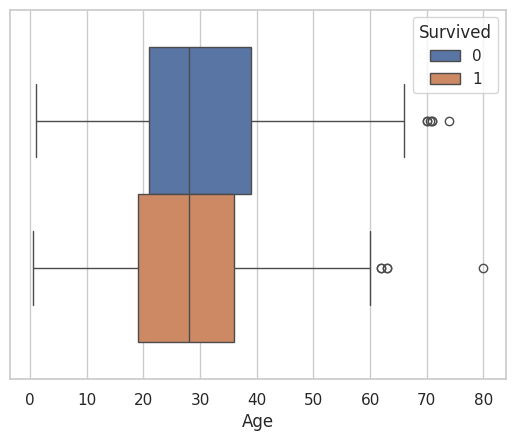

In [ ]:
sns.boxplot(data=df, x="Age", hue="Survived")

<Axes: xlabel='SibSp', ylabel='count'>

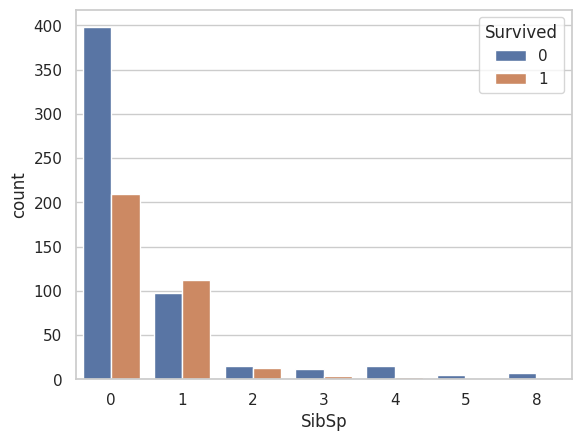

In [4]:
# SibSp vs survived

sns.countplot(data=df, x="SibSp", hue="Survived")

In [9]:
df.groupby("SibSp")["Survived"].value_counts(normalize=True)

SibSp  Survived
0      0           0.654605
       1           0.345395
1      1           0.535885
       0           0.464115
2      0           0.535714
       1           0.464286
3      0           0.750000
       1           0.250000
4      0           0.833333
       1           0.166667
5      0           1.000000
8      0           1.000000
Name: proportion, dtype: float64

In [7]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


<Axes: xlabel='SibSp'>

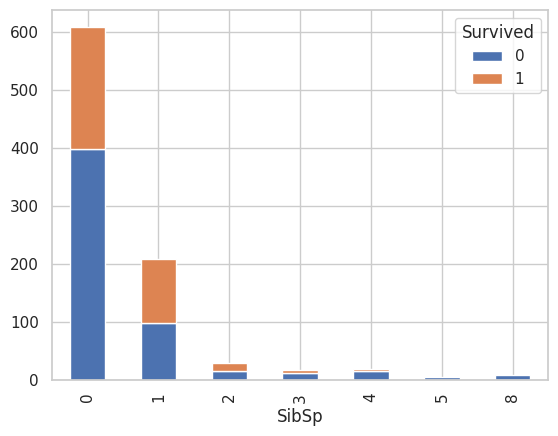

In [12]:
pd.crosstab(df["SibSp"],df["Survived"]).plot(kind="bar", stacked=True)

<Axes: xlabel='Parch', ylabel='count'>

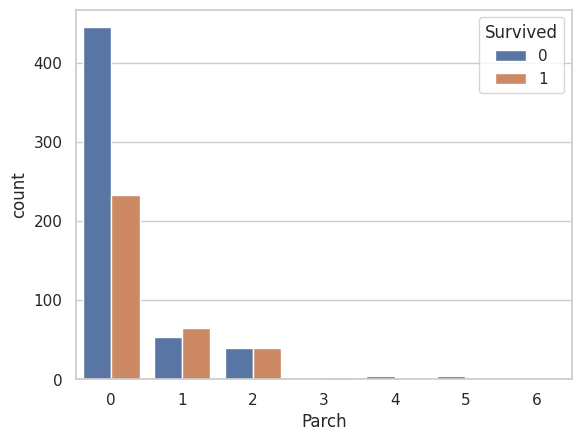

In [13]:
sns.countplot(data=df, x="Parch", hue="Survived")

In [19]:
df.groupby("Parch")["Survived"].value_counts(normalize=True).mul(100)

Parch  Survived
0      0            65.634218
       1            34.365782
1      1            55.084746
       0            44.915254
2      0            50.000000
       1            50.000000
3      1            60.000000
       0            40.000000
4      0           100.000000
5      0            80.000000
       1            20.000000
6      0           100.000000
Name: proportion, dtype: float64

<Axes: xlabel='Parch'>

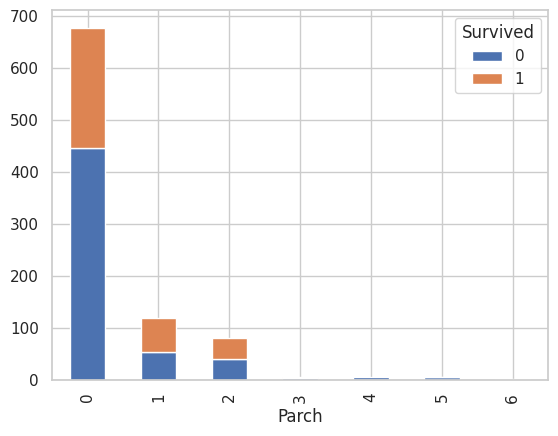

In [17]:
pd.crosstab(df['Parch'],df["Survived"]).plot(kind="bar",stacked=True)

<Axes: xlabel='Fare', ylabel='Count'>

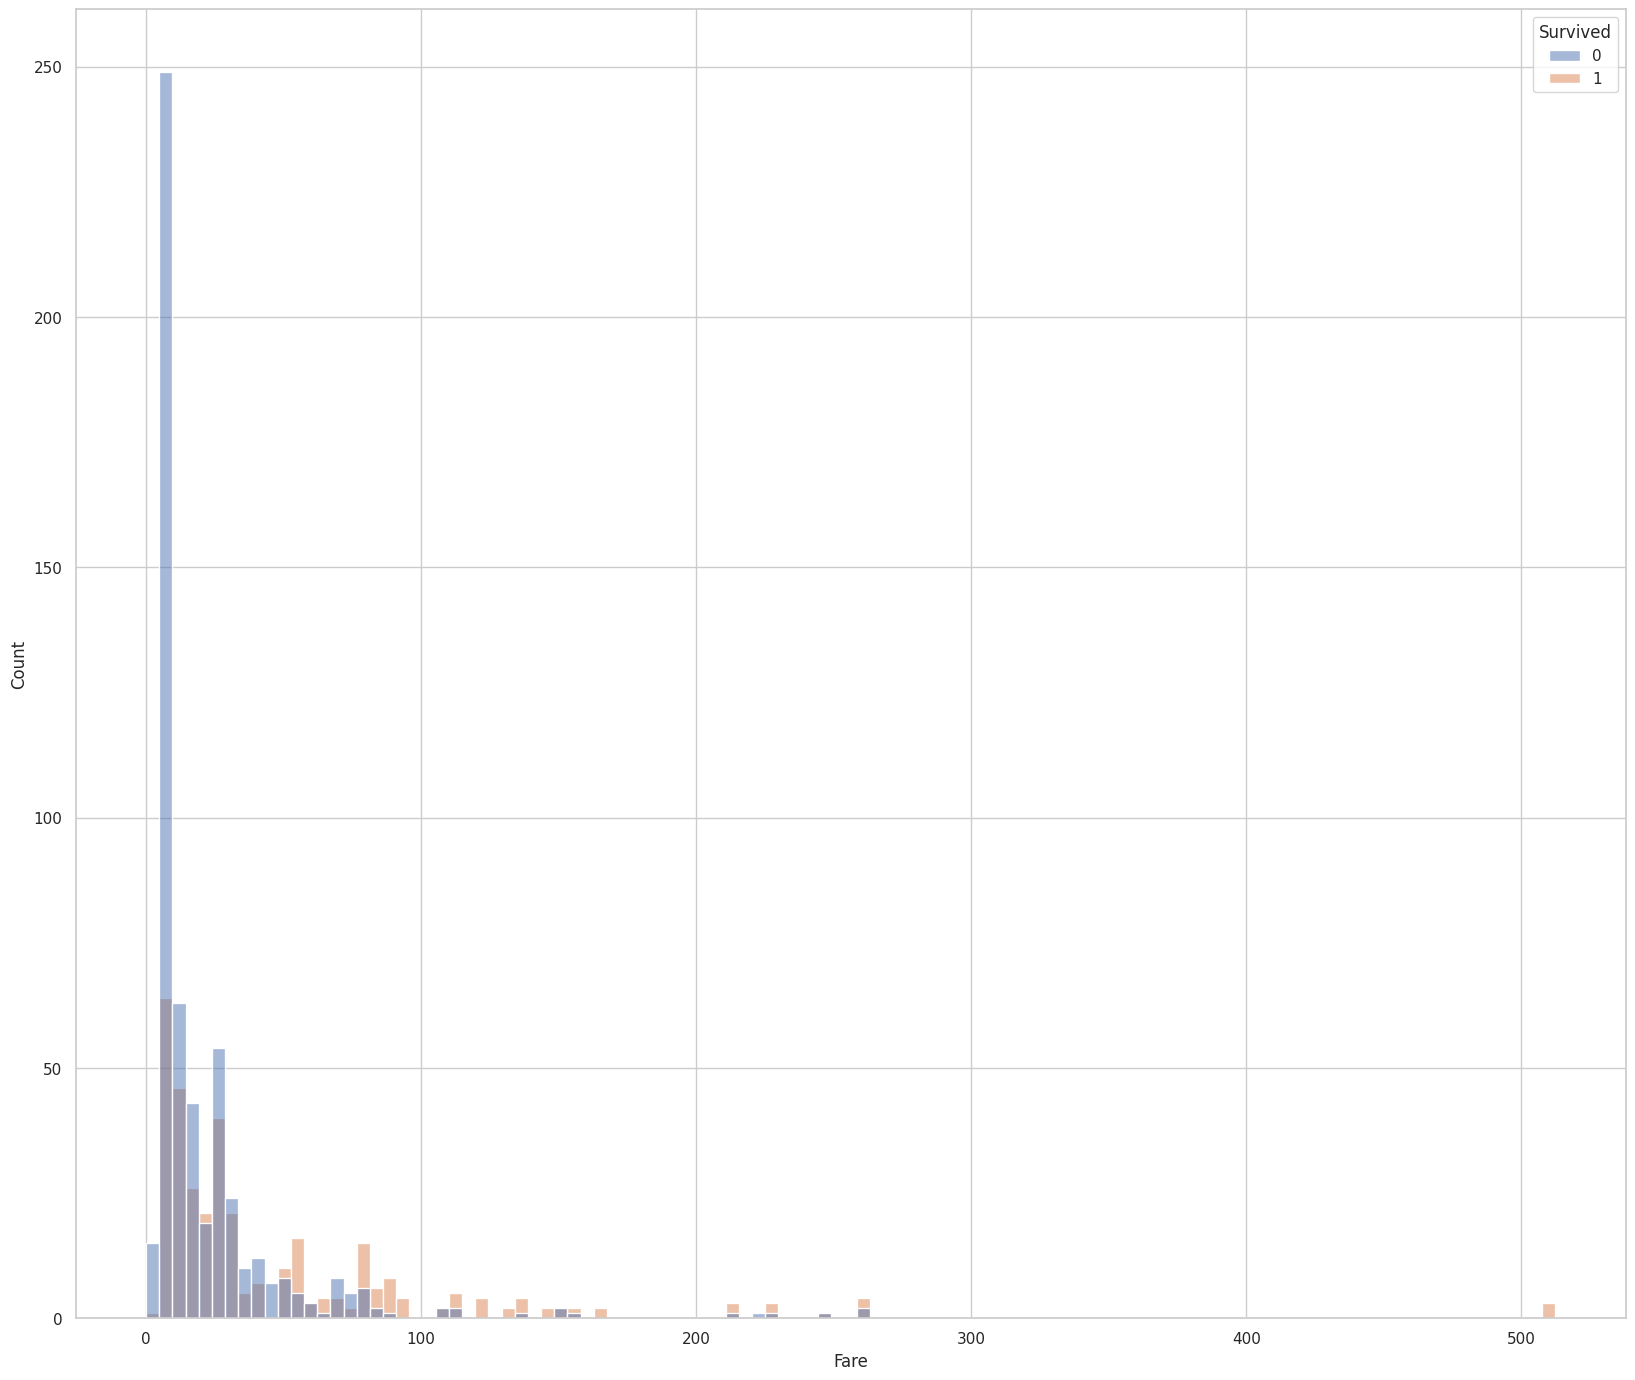

In [22]:
# fare vs sur
plt.figure(figsize=(20,17))
sns.histplot(data=df, x="Fare", hue="Survived")

<Axes: xlabel='Fare'>

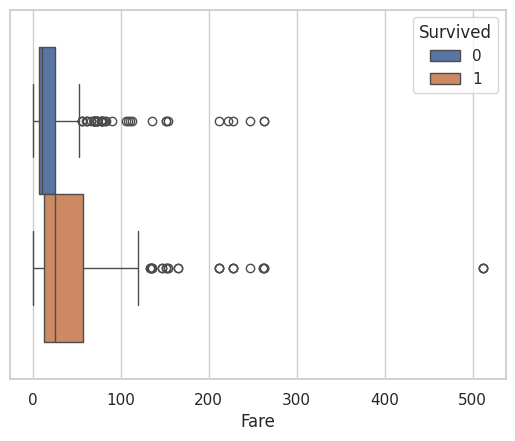

In [23]:
sns.boxplot(data=df , x="Fare", hue="Survived")

<Axes: xlabel='Embarked', ylabel='count'>

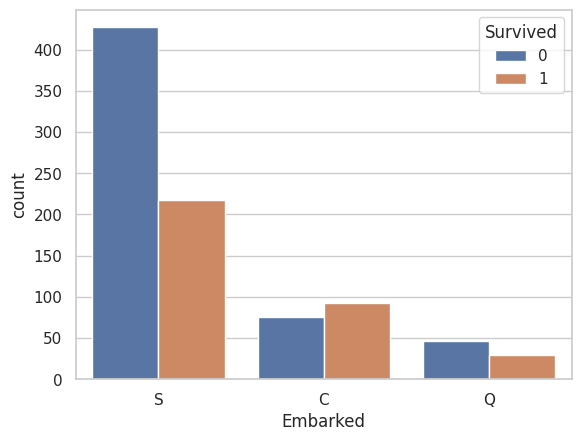

In [24]:
# Embarked vs sur

sns.countplot(data=df, x= "Embarked",hue="Survived")

In [27]:
df.groupby("Embarked")["Survived"].value_counts(normalize=True).mul(100)

Embarked  Survived
C         1           55.357143
          0           44.642857
Q         0           61.038961
          1           38.961039
S         0           66.304348
          1           33.695652
Name: proportion, dtype: float64

<Axes: xlabel='Embarked'>

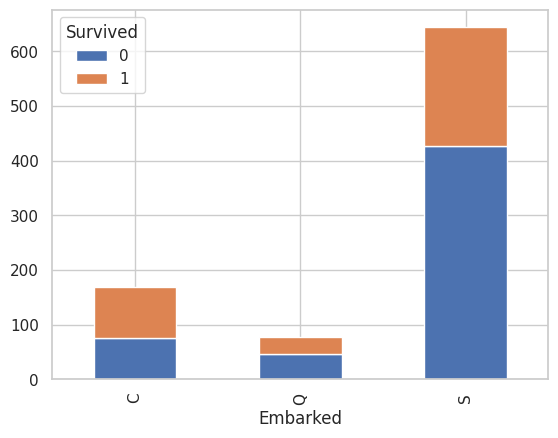

In [26]:
pd.crosstab(df["Embarked"], df["Survived"]).plot(kind='bar', stacked=True)

In [28]:
df.groupby("Embarked")["Pclass"].value_counts(normalize=True).mul(100)

Embarked  Pclass
C         1         50.595238
          3         39.285714
          2         10.119048
Q         3         93.506494
          2          3.896104
          1          2.597403
S         3         54.813665
          2         25.465839
          1         19.720497
Name: proportion, dtype: float64

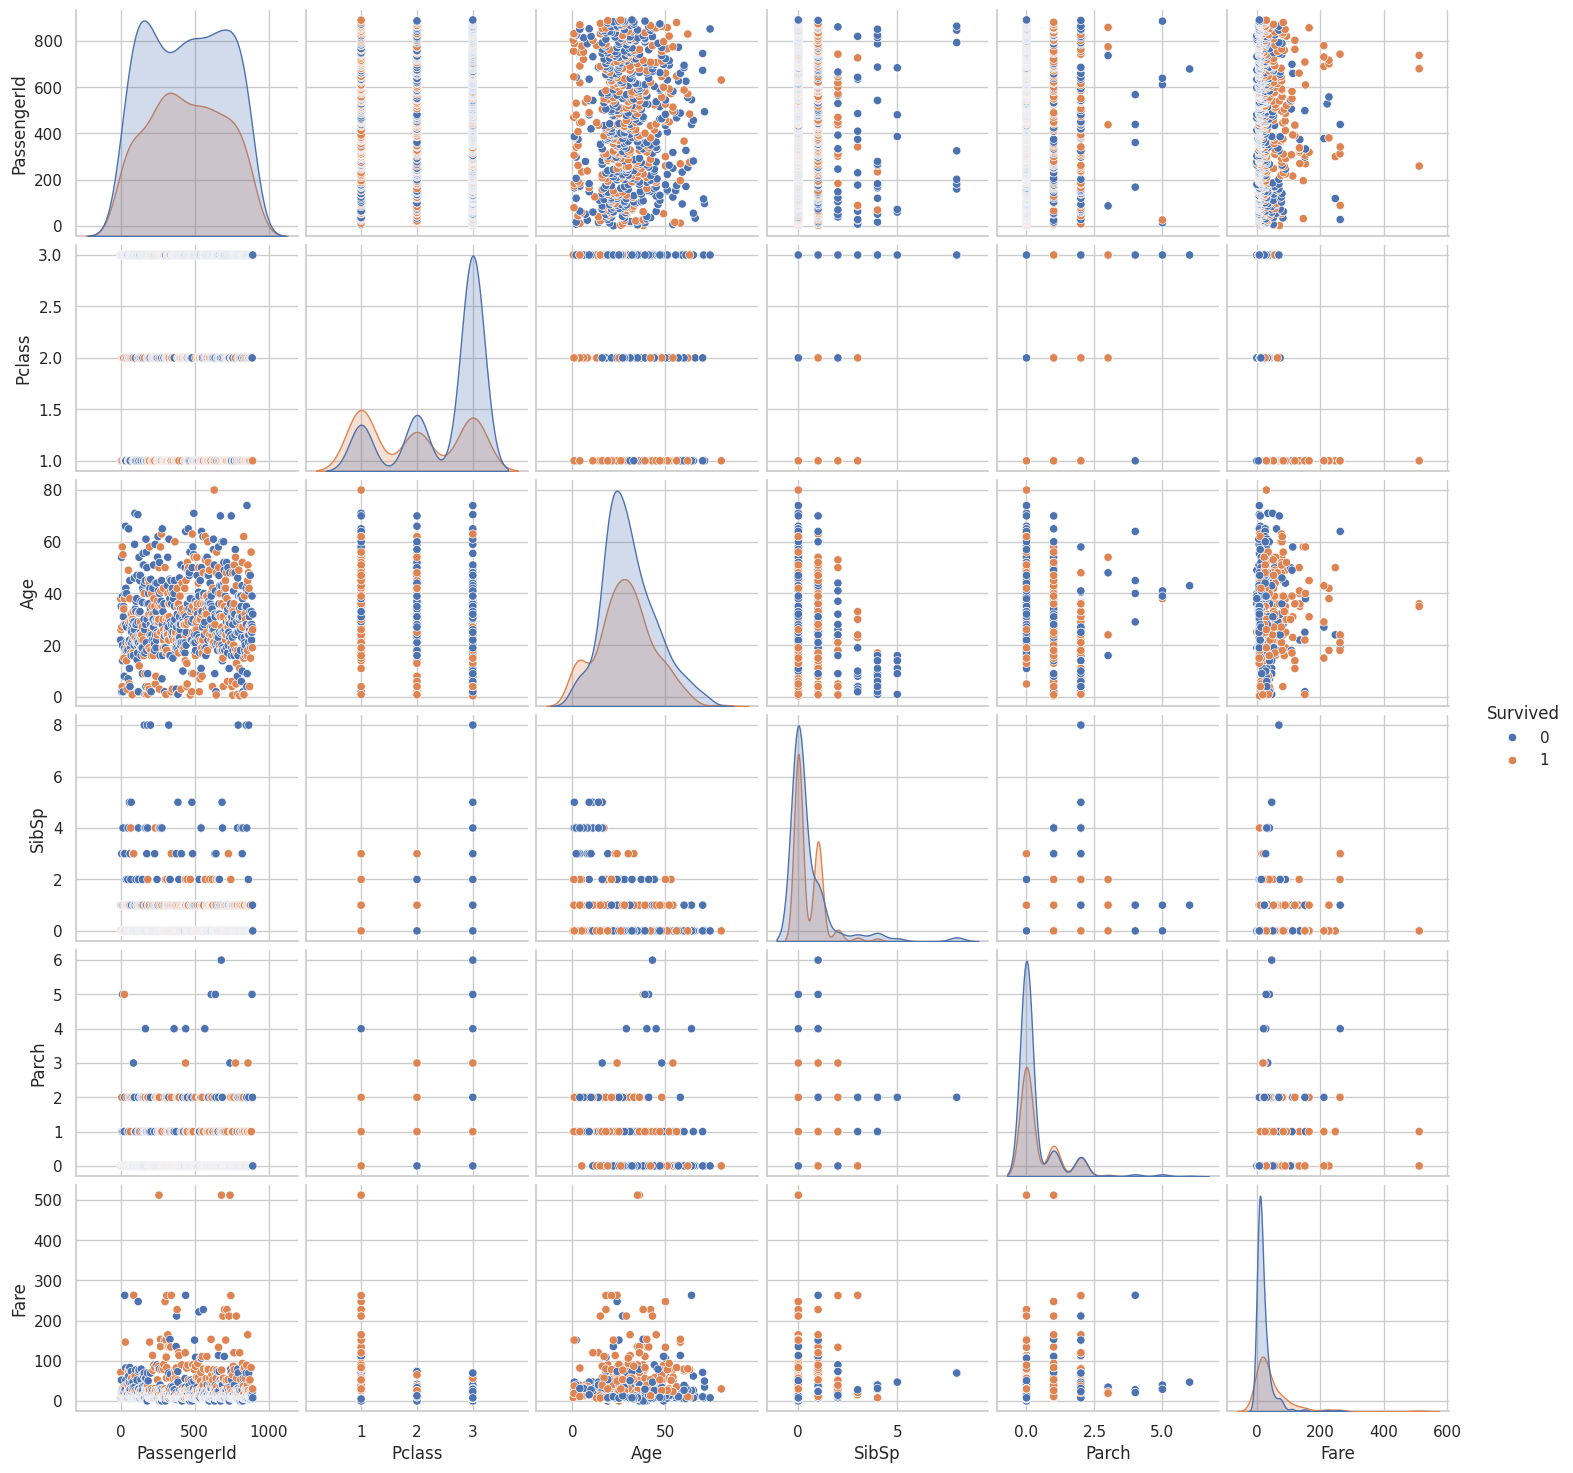

In [29]:
sns.pairplot(data=df, hue="Survived")